<a href="https://colab.research.google.com/github/donggeunahn/class-2022-spring/blob/main/audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Processing
---

https://musiclab.chromeexperiments.com/Spectrogram/

### Fourier transform (분석용)
* spectrum은 주어진 signal에 대해 어떤 주파수 성분이 많이 있나?-->x축은 주파수 y축은 amplitude
-->고음이 많이 나왔으니깐 바이올린 연주했다 추측 
* spectrogram은 spectrum을 time 축으로 concatenate한 것-->여러개의 spectrum을 시간축으로 쌓아서 입체적으로 바라봄-->x축이 시간 y축이 주파수
* 방법: signal (inner product) a series of complex phasors with different frequencies
* inner product는 일종의 correlation (즉, 해당 frequency가 얼마나 있는지 probing)
-->signal 이 있을때 다양한 frequency를 갖도록 sin곡선을 만들어서(phasor)를 inner product 해준다
-->기존의 signal과 내가 원하는 부분의 성분이 있는지 보기 위해서 그것과 똑같은 길이의 complex phasor를 만들어서 inner product 

**inner product**--> 똑같은 길이의 두 벡터가 있을 때 각각 다 곱하여 더하는 것

-->inner product 하는 이유

-->주파수가 원래 signal에 있다면 높은 correlation 값 
없다면 낮은 값

complex phasor는 a+bi로 되어 있어 abs를 사용--> 이게 fourier transform 되는 값이며 시간으로 concatenate
* 왜? sine phasor 안 쓰나? phase sensitivity 때문
-->sin phasor의 약점
**x축이 시간 y축은 주파수**

성분이 얼마나 많은지에 따라서 모음 구분

소리는 보통 하나의 sin 곡선이 아닌 여러 개가 합쳐진 형태
-->어떤 음을 내는 것 같지만 그것과 공명하는 다른 음도 동시에
-->주파수 분석을 해야지 알 수 있다, wave 상에서는 불가능

### Filter (변환용)
신호가 있을 때 실제 변형을 준다
* A --> function -->  B
-->변형을 하는 것을 함수라고 하지만 filter라고 부른다
* signal A --> filter --> signal B
* 신호 (time function)를 입력으로 하는 함수를 filter라고 함-->x축이 time이다
* 왜? filter 라고 부름? 이 함수의 목적이 특정 주파수에 대한 manipulation이므로.
(**예: 어떤 주파수대를 작게, 크게, 통과, 제거 등)**
* 방법: weighted sum of signal's shifts (두가지 방법: FIR, IIR)

  * FIR: Y(k) = b<sub>1</sub>X(k) + b<sub>2</sub>X(k-1) + ... 

Y = H * X-->Y는 이런 필터를 X에 곱해라

b1, b2같은 계수값만 알면 filter 사용가능
-->sample을 shift
-->원 signal을 X(k) 옆으로 옮긴 것은 X(k-1)
  
  1/2 X(k) + 1/2 X(k-1)-->둘의 중간값-->원래보다 기울기가 완만

-->b1이 1이고 b2부터 0이면 filter의 역할 없음

  * IIR: a<sub>1</sub>Y(k) + a<sub>2</sub>Y(k-1) + ... = X(k)

Y = (1/H) * X-->역함수 관계라서 1/H
-->출력을 shift

a1, a2 같은 것만 알고 있으면 filter 사용 가능
이미 정해져 있음

-->a1이 1이고 a2부터 0이면 filter의 역할 없음
### Auto correlation
* measuring pitch / F0
음의 높낮이를 재는 것

### RMS: root mean square
* measuring intensity-->db

제곱을 하고 다 더해서 평균에 루트--> 다 제곱을 해서 모두 양수로 만듦

root mean square는 진폭에 해당되는 길이를 나타냄


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

### load / plot / play sound file

In [ ]:
# from google.colab import files
# fn = files.upload()
#-->컴퓨터 파일 불러오는 법
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

s, sr = librosa.load('aeiou.wav')
#s는 48600개의 1d array
#sr은 22050개 -->1초에 22050개의 샘플이 있다-->시간은 2초 조금 넘을 듯

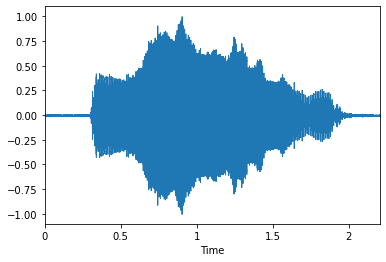

In [ ]:
s = librosa.util.normalize(s)
librosa.display.waveplot(s, sr) #plotting 해줌
ipd.Audio(s[7000:12000], rate=sr)#7000에서 12000만 끊어서 들려줘라
#normalize는 -1과 1사이에 위치-->전체를 절댓값의 최댓값으로 나눠줌

### Fourier Transform for Spectrogram

(0.0, 5000.0)

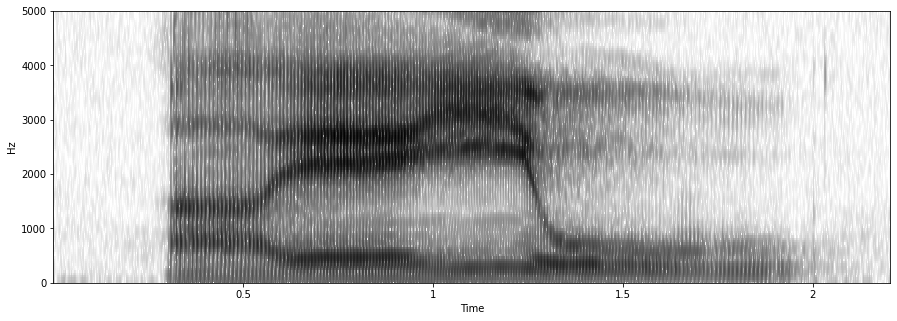

In [ ]:
s_preemp = librosa.effects.preemphasis(s)
#fourier transform--> 절댓값으로 complex phasor 표현
n_fft=512
#총 512개의 주파수
hop_length=int(0.001*sr)
#0.001초 간격으로 되어있음
win_length=int(sr*0.008)
#한장의 길이를 0.008초로 설정
#한장의 스펙트럼은 x축이 freq, 스펙트로그램은 y축이 freq
#까만부분이 눈쪽으로 솟아있음--> 흰부분은 꺼져 있음
spec = librosa.stft(s_preemp, n_fft=n_fft,hop_length=hop_length, 
win_length=win_length, window = 'hann')
magspec = np.abs(spec)#복소수를 실수 값으로 바꿔줌
dBspec = librosa.amplitude_to_db(magspec, ref=np.max)
#db 형태로 scale을 바꿔줌
#complex phasor라서 복소수 형태-->abs는 absolute
#-->복소수는 x축 실수부 y축 허수부인 그래프에 찍히는데 원점으로부터의 거리


plt.figure(figsize=(15, 5))
librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')
plt.ylim((0,5000))

### Filter for audio transformation

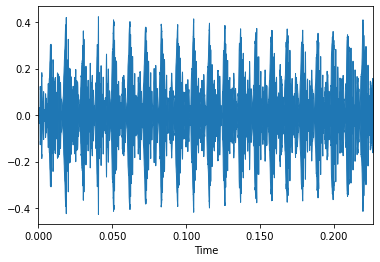

In [ ]:
from scipy.signal import lfilter
sig = s[7000:12000] #given signal은 a
sig = lfilter(np.array([1]), np.array([1]), sig, axis=0)
#linear filter-->(b,a,sig, axis)
#array로 넣어줘야 함-->1만 넣으면 소리가 바뀌지 않음
#sig = lfilter(np.array([1/2, 1/2, 1/2]), np.array([1]), sig, axis=0)
#-->소리가 조금 부드러워짐
#fir과 iir의 역할이 다름
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

### RMS(Root Mean Square) for intensity

In [ ]:
rms = librosa.feature.rms(s)
plt.plot(rms[0])

### Autocorrelation for pitch(F0) measurement

spectrum이 반복됨-->미세한 떨림의 길이를 세봄-->
0.007초면 1초에? 1/0.007=약 137번-->이게 주파수

수학적인 방법으로 주파수를 구함

Auto correlation은 inner product-->correlation이니까

auto는 자기자신과라는 뜻

주파수를 옆으로 움직이면 inner product가 점점 작아지다가 확 높아지는 순간이 있음-->패턴이 반복되니깐
x축이 lag y축이 correlation
안움직였을 때 correlation 1 그리고 u자 형태
처음 올라오는 correlation peak를 활용

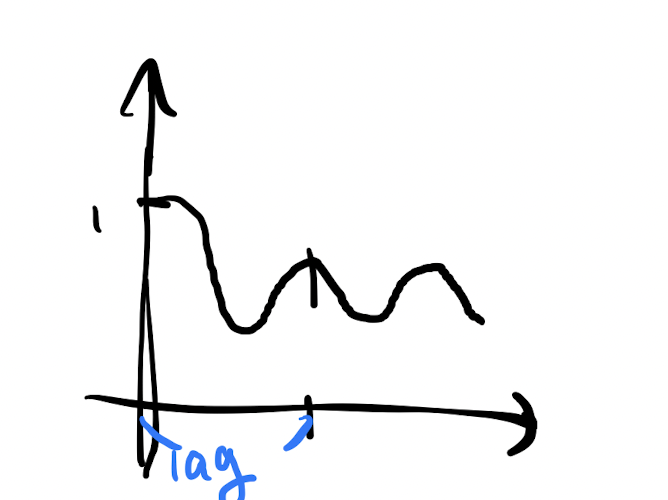

원점부터 첫번째 피크까지의 시간이 반복되는 패턴의 길이

 1/ 1st lag까지의 시간= pitch





In [ ]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, 60, 200)
plt.plot(F0, '.')

Praat

wave form

spectrogram --> x축은 time y축이 frequency
-->진하게 되어있는 부분이 강하게 있는 부분

파란줄은 pitch-->음의 높낮이 

intensity-->소리의 세기 진폭하고 어느정도 일치

spectral slice-->x축이 freq y축이 intensity





